# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

Hypotheses 1 = CO, SO₂, NO₂, and O₃ AQI levels have decreased from 2003 to 2013 due to environmental regulations

Hypotheses 2 = States with higher industrial activity have higher levels of CO, SO₂, NO₂, and O₃ AQI compared to states with lower industrial activity

Hypotheses 3 = SO₂ and NO₂ AQI levels are higher in states with more coal power plants (e.g., Texas, Pennsylvania, Illinois)

Hypotheses 4 = CO2 and NO₂ AQI levels spike during winter months due to increased heating and stagnant air

Hypotheses 5 = O₃ AQI levels are higher in summer months due to increased sunlight and heat

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\March_Team_Project-H\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [8]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

NameError: name 'os' is not defined

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

NameError: name 'os' is not defined

# Section 1

Section 1 content

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Path to the ZIP file
zip_path = r"C:\Users\seebi\downloads\VSCODE_Projects\March_Team_Project-H\Source_Data\pollution_us_2000_2016.csv.zip"

# Read CSV directly from ZIP
with zipfile.ZipFile(zip_path) as z:
    with z.open("pollution_us_2000_2016.csv") as file:
        pollution = pd.read_csv(file)

# Display the first few rows
print(pollution.head())


   Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion

In [10]:
# Check for missing values in each column
print(pollution.isnull().sum())


Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64


In [11]:
# Check correlation of missing values
missing_corr = pollution.isnull().astype(int).corr()
print(missing_corr["SO2 AQI"])
print(missing_corr["CO AQI"])

Unnamed: 0                NaN
State Code                NaN
County Code               NaN
Site Num                  NaN
Address                   NaN
State                     NaN
County                    NaN
City                      NaN
Date Local                NaN
NO2 Units                 NaN
NO2 Mean                  NaN
NO2 1st Max Value         NaN
NO2 1st Max Hour          NaN
NO2 AQI                   NaN
O3 Units                  NaN
O3 Mean                   NaN
O3 1st Max Value          NaN
O3 1st Max Hour           NaN
O3 AQI                    NaN
SO2 Units                 NaN
SO2 Mean                  NaN
SO2 1st Max Value         NaN
SO2 1st Max Hour          NaN
SO2 AQI              1.000000
CO Units                  NaN
CO Mean                   NaN
CO 1st Max Value          NaN
CO 1st Max Hour           NaN
CO AQI              -0.000011
Name: SO2 AQI, dtype: float64
Unnamed: 0                NaN
State Code                NaN
County Code               NaN
Site Num  

In [12]:
missing_by_state = pollution[pollution["SO2 AQI"].isnull()].groupby("State").size()
print(missing_by_state)


State
Alabama                   1562
Alaska                     987
Arizona                  34915
Arkansas                 17666
California              287910
Colorado                 17590
Connecticut              14964
Country Of Mexico         4752
Delaware                  1815
District Of Columbia     12835
Florida                  12959
Georgia                   3861
Hawaii                   10116
Idaho                      912
Illinois                 25056
Indiana                   6962
Iowa                     12921
Kansas                   15737
Kentucky                  7342
Louisiana                11936
Maine                    11808
Maryland                 11766
Massachusetts            10784
Michigan                  4091
Minnesota                 1747
Missouri                  9888
Nevada                    4849
New Hampshire             4647
New Jersey               13364
New Mexico                3557
New York                 35238
North Carolina           18563
No

In [13]:
pollution["Year"] = pd.to_datetime(pollution["Date Local"]).dt.year
missing_by_year = pollution[pollution["SO2 AQI"].isnull()].groupby("Year").size()
print(missing_by_year)


Year
2000    45818
2001    44730
2002    46763
2003    43191
2004    41053
2005    42605
2006    50411
2007    57676
2008    59758
2009    52009
2010    51971
2011    64597
2012    64057
2013    67259
2014    65741
2015    62973
2016    12295
dtype: int64


In [14]:
# Total number of rows per state
total_by_state = pollution["State"].value_counts()

# Missing values per state for SO2 & CO
missing_so2 = pollution["SO2 AQI"].isnull().groupby(pollution["State"]).sum()
missing_co = pollution["CO AQI"].isnull().groupby(pollution["State"]).sum()

# Convert to percentage
missing_so2_pct = (missing_so2 / total_by_state * 100).fillna(0)
missing_co_pct = (missing_co / total_by_state * 100).fillna(0)

# Print sorted missing data percentages
print(pd.DataFrame({"SO2 Missing %": missing_so2_pct, "CO Missing %": missing_co_pct}).sort_values(by="SO2 Missing %", ascending=False))


                      SO2 Missing %  CO Missing %
State                                            
Michigan                  50.000000     49.963334
Alaska                    50.000000     49.949341
Wisconsin                 50.000000     50.000000
Virginia                  50.000000     49.991763
Utah                      50.000000     50.000000
Tennessee                 50.000000     50.051352
South Dakota              50.000000     50.024050
South Carolina            50.000000     50.000000
Rhode Island              50.000000     50.031626
North Dakota              50.000000     49.990924
North Carolina            50.000000     49.997306
New Hampshire             50.000000     50.010760
Nevada                    50.000000     50.030934
Wyoming                   50.000000     50.015328
Arkansas                  50.000000     50.005661
Delaware                  50.000000     49.917355
Florida                   50.000000     50.003858
Georgia                   50.000000     50.012950


In [15]:
print(pollution.columns)
# printing the columns of the dataset

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'Year'],
      dtype='object')


In [16]:
# Count total number of unique stations
total_stations = pollution["Site Num"].nunique()

# Count stations with at least one SO2 or CO measurement
stations_with_so2 = pollution.loc[pollution["SO2 AQI"].notnull(), "Site Num"].nunique()
stations_with_co = pollution.loc[pollution["CO AQI"].notnull(), "Site Num"].nunique()

print(f"Total monitoring stations: {total_stations}")
print(f"Stations measuring SO2: {stations_with_so2} ({(stations_with_so2/total_stations)*100:.2f}%)")
print(f"Stations measuring CO: {stations_with_co} ({(stations_with_co/total_stations)*100:.2f}%)")

# Checking whether some stations are even recording CO2 or SO2 values

Total monitoring stations: 110
Stations measuring SO2: 110 (100.00%)
Stations measuring CO: 110 (100.00%)


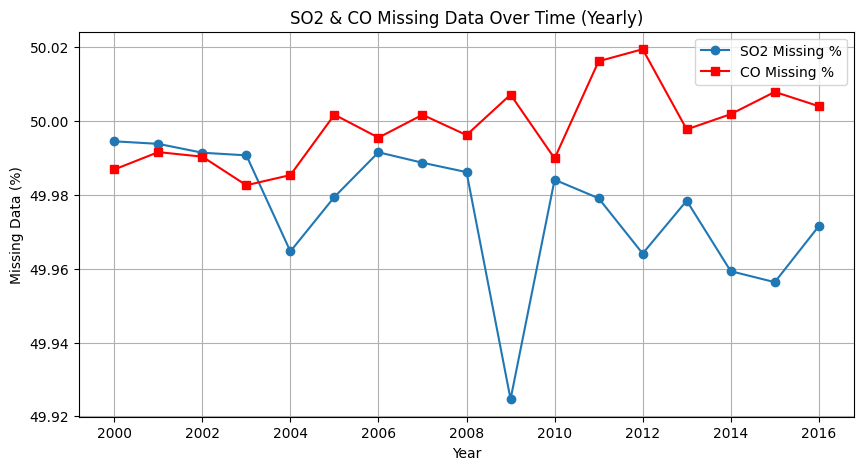

In [17]:
# Extract Year
pollution["Year"] = pd.to_datetime(pollution["Date Local"]).dt.year

# Calculate missing percentages per year
missing_so2_year = pollution["SO2 AQI"].isnull().groupby(pollution["Year"]).mean() * 100
missing_co_year = pollution["CO AQI"].isnull().groupby(pollution["Year"]).mean() * 100

# Plot missing data over time
plt.figure(figsize=(10,5))
plt.plot(missing_so2_year.index, missing_so2_year.values, marker="o", label="SO2 Missing %")
plt.plot(missing_co_year.index, missing_co_year.values, marker="s", label="CO Missing %", color="red")
plt.xlabel("Year")
plt.ylabel("Missing Data (%)")
plt.title("SO2 & CO Missing Data Over Time (Yearly)")
plt.legend()
plt.grid()
plt.show()


Consistently missing data, and 2009 is an anomaly, which must be investigated further. 

<Axes: xlabel='SO2 AQI', ylabel='NO2 AQI'>

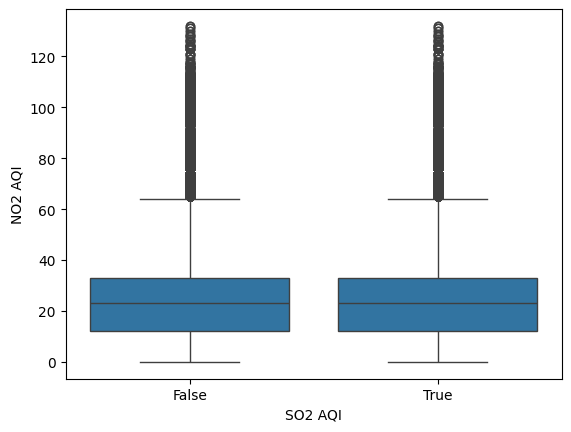

In [18]:
# Check if missing values depend on other factors
sns.boxplot(x=pollution["SO2 AQI"].isnull(), y=pollution["NO2 AQI"])

Missing data for CO2 and SO2 is not random, perhaps systematic because each state is missing between 49.02% to 50.02%

In [19]:
anomaly_year = 2009  # Investigating the anomaly to see why it had happened.
anomaly_check = pollution[pollution["Year"] == anomaly_year].isnull().mean() * 100
print(anomaly_check[["SO2 AQI", "CO AQI"]])


SO2 AQI    49.924646
CO AQI     50.007199
dtype: float64


Even though it is an anomaly year, its still close to the original values backing the point that the missing data pattern is systematic.

In [20]:
# Get missing percentage per station for the anomaly year
missing_by_station_anomaly = pollution[pollution["Year"] == anomaly_year].groupby("Site Num")[["SO2 AQI", "CO AQI"]].apply(lambda x: x.isnull().mean() * 100)

print(missing_by_station_anomaly.sort_values("SO2 AQI"))
# Checking which stations were affected

            SO2 AQI     CO AQI
Site Num                      
5005      48.222222  50.074074
1002      48.524845  50.000000
4003      49.793673  50.000000
1025      49.795362  50.000000
4         49.906933  50.023267
...             ...        ...
124       50.000000  50.000000
133       50.000000  50.000000
306       50.000000  50.000000
37        50.000000  50.000000
9997      50.000000  50.000000

[61 rows x 2 columns]


Now next steps is to replace missing SO₂ and CO values with the mean/median for that state or station



In [21]:
pollution[["CO AQI", "SO2 AQI"]].describe()
# checking for the values 

,CO AQI,SO2 AQI
count,873338.000000,873754.000000
mean,5.996595,7.115945
std,5.851836,11.937473
min,0.000000,0.000000
25%,2.000000,1.000000
50%,5.000000,3.000000
75%,8.000000,9.000000
max,201.000000,200.000000


In [22]:
zero_percent = (pollution[["CO AQI", "SO2 AQI"]] == 0).mean() * 100
print(zero_percent)
# checking what percentage of the aqi's are 0 if there are any

CO AQI      1.954816
SO2 AQI    10.987478
dtype: float64


In [23]:
zero_counts = (pollution[["CO AQI", "SO2 AQI"]] == 0).sum()
print(zero_counts)
# showing exactly how many times 0 appears for AQI's

CO AQI      34144
SO2 AQI    191914
dtype: int64


In [24]:
pollution.groupby("Year")[["CO AQI", "SO2 AQI"]].apply(lambda x: (x == 0).sum())
# checking for how many zero values there are per year

,CO AQI,SO2 AQI
Year,,
2000,1747,3051
2001,1950,3158
2002,2798,4873
2003,1942,4150
2004,1434,3253
2005,2775,3578
2006,2646,4343
2007,2985,5924
2008,2831,8143


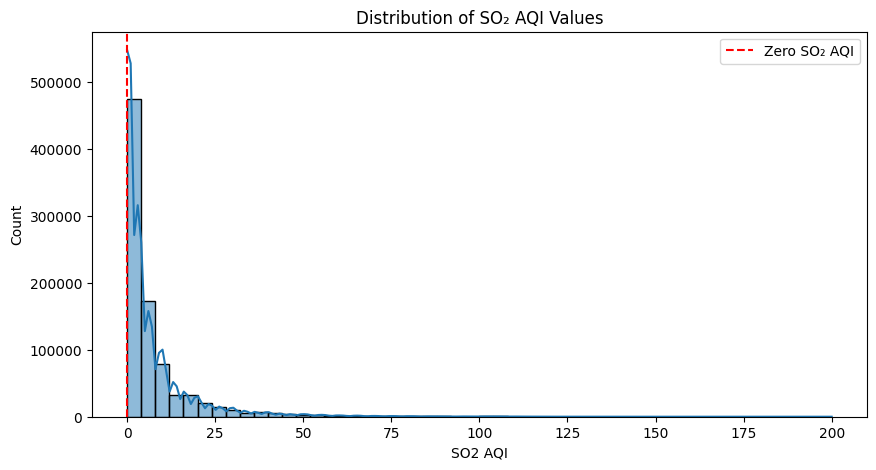

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(pollution["SO2 AQI"], bins=50, kde=True)
plt.axvline(0, color="red", linestyle="dashed", label="Zero SO₂ AQI")
plt.legend()
plt.title("Distribution of SO₂ AQI Values")
plt.show()
# trying to see whether the zeros are missing data or valid data

A sudden spike at 0 suggests that some stations might have defaulted to 0 as SO₂ rarely stays exactly at 0 for extended periods across multiple locations, which could mean that the AQI of SO2 is potentially not valid, but we will fill in the missing data first.

In [26]:
print("Missing values before filling:")
print(pollution[["CO AQI", "SO2 AQI"]].isna().sum())
# just checking how many missing values before we fill in the values

Missing values before filling:
CO AQI     873323
SO2 AQI    872907
dtype: int64


In [27]:
print(pollution.columns)
# printing the columns 


Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'Year'],
      dtype='object')


In [28]:
print(pollution["Year"].dtype)
# checking what type is 'year'

int32


In [29]:
pollution["Year"] = pollution["Year"].astype(int)
# converting 'year' to integer

In [30]:
# Check column names
print("Columns in dataset:", pollution.columns)

# Check for missing or unexpected values in 'Year' and 'State'
print("Unique values in 'Year':", pollution["Year"].unique()[:10])  # Show first 10 unique years
print("Unique values in 'State':", pollution["State"].unique())  # Show all unique states


Columns in dataset: Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'Year'],
      dtype='object')
Unique values in 'Year': [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]
Unique values in 'State': ['Arizona' 'California' 'Colorado' 'District Of Columbia' 'Florida'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Michigan'
 'Missouri' 'New Jersey' 'New York' 'North Carolina' 'Oklahoma'
 'Pennsylvania' 'Texas' 'Virginia' 'Massachusetts' 'Nevada'
 'New Hampshire' 'Tennessee' 'South Carolina' 'Connecticut' 'Iowa' 'Maine'
 'Maryland' 'Wisconsin' 'Country Of Mexico' 'Arkansas' 'Oreg

In [31]:
print(pollution["Year"].unique())  # Display all unique years

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


In [32]:
# Drop rows where CO AQI or SO2 AQI is missing
pollution_cleaned = pollution.dropna()

# Check if missing values are fully removed
print("Missing values after dropping:")
print(pollution_cleaned[["CO AQI", "SO2 AQI"]].isnull().sum())
pollution_cleaned


Missing values after dropping:
CO AQI     0
SO2 AQI    0
dtype: int64


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Year
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,2000
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0,2000
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0,2000
13,13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,...,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0,2000
17,17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,...,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746642,24585,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-27,Parts per billion,...,-0.095238,0.0,0,0.0,Parts per million,0.100000,0.1,0,1.0,2016
1746646,24589,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-28,Parts per billion,...,0.117391,0.5,7,0.0,Parts per million,0.100000,0.1,0,1.0,2016
1746650,24593,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-29,Parts per billion,...,0.143750,0.7,8,0.0,Parts per million,0.006667,0.1,0,1.0,2016
1746654,24597,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,0.016667,0.1,0,0.0,Parts per million,0.091667,0.1,2,1.0,2016


In [33]:
# Check for missing values in the relevant columns
print(pollution_cleaned[['Year', 'State Code', 'County Code', 'Site Num', 'Address', 'State', 'County', 'City', 
                         'Date Local', 'NO2 Units', 'O3 Units', 'SO2 Units', 'CO Units']].isnull().sum())

# Drop rows with missing values in the relevant columns
pollution_cleaned = pollution_cleaned.dropna(subset=['Year', 'State Code', 'County Code', 'Site Num', 'Address', 
                                                     'State', 'County', 'City', 'Date Local', 'NO2 Units', 
                                                     'O3 Units', 'SO2 Units', 'CO Units'])

# Perform the aggregation
pollution_cleaned_summary = pollution_cleaned.groupby(['Year', 'State Code', 'County Code', 'Site Num', 'Address', 
                                                        'State', 'County', 'City', 'Date Local', 'NO2 Units', 
                                                        'O3 Units', 'SO2 Units', 'CO Units']).agg(
    NO2Mean_mean=('NO2 Mean', 'mean'),
    O3Mean_mean=('O3 Mean', 'mean'),
    SO2Mean_mean=('SO2 Mean', 'mean'),
    COMean_mean=('CO Mean', 'mean'),
    NO21stMaxValue_max=('NO2 1st Max Value', 'max'),
    NO21stMaxHour_max=('NO2 1st Max Hour', 'max'),
    NO2_Aqi_Mean=('NO2 AQI', 'mean'),
    O31stMaxValue_max=('O3 1st Max Value', 'max'),
    O31stMaxHour_max=('O3 1st Max Hour', 'max'),
    O3_Aqi_Mean=('O3 AQI', 'mean'),
    SO21stMaxValue_max=('SO2 1st Max Value', 'max'),
    SO21stMaxHour_max=('SO2 1st Max Hour', 'max'),
    SO2_Aqi_Mean=('SO2 AQI', 'mean'),
    CO1stMaxValue_max=('CO 1st Max Value', 'max'),
    CO1stMaxHour_max=('CO 1st Max Hour', 'max'),
    CO_Aqi_Mean=('CO AQI', 'mean'),
    NO2_AQI_STD=('NO2 AQI', 'std'),
    O3_AQI_STD=('O3 AQI', 'std'),
    SO2_AQI_STD=('SO2 AQI', 'std'),
    CO_AQI_STD=('CO AQI', 'std')
).reset_index()

# Display the summary
print(pollution_cleaned_summary)
pollution_cleaned_summary

Year           0
State Code     0
County Code    0
Site Num       0
Address        0
State          0
County         0
City           0
Date Local     0
NO2 Units      0
O3 Units       0
SO2 Units      0
CO Units       0
dtype: int64
        Year  State Code  County Code  Site Num  \
0       2000           4           13      3002   
1       2000           4           13      3002   
2       2000           4           13      3002   
3       2000           4           13      3002   
4       2000           4           13      3002   
...      ...         ...          ...       ...   
412645  2016          56           21       100   
412646  2016          56           21       100   
412647  2016          56           21       100   
412648  2016          56           21       100   
412649  2016          56           21       100   

                                        Address    State    County  \
0       1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
1       1645 

,Year,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO21stMaxValue_max,SO21stMaxHour_max,SO2_Aqi_Mean,CO1stMaxValue_max,CO1stMaxHour_max,CO_Aqi_Mean,NO2_AQI_STD,O3_AQI_STD,SO2_AQI_STD,CO_AQI_STD
0,2000,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,9.0,21,13.0,2.2,23,25.0,NaN,NaN,NaN,NaN
1,2000,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,3.0,22,4.0,2.3,0,26.0,NaN,NaN,NaN,NaN
2,2000,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,11.0,19,16.0,2.5,8,28.0,NaN,NaN,NaN,NaN
3,2000,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,...,16.0,8,23.0,3.0,23,34.0,NaN,NaN,NaN,NaN
4,2000,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,...,15.0,7,21.0,3.7,2,42.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412645,2016,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-27,Parts per billion,...,0.0,0,0.0,0.1,0,1.0,NaN,NaN,NaN,NaN
412646,2016,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-28,Parts per billion,...,0.5,7,0.0,0.1,0,1.0,NaN,NaN,NaN,NaN
412647,2016,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-29,Parts per billion,...,0.7,8,0.0,0.1,0,1.0,NaN,NaN,NaN,NaN
412648,2016,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,0.1,0,0.0,0.1,2,1.0,NaN,NaN,NaN,NaN


In [34]:
pollution_cleaned.groupby(['Year', 'State Code', 'County Code', 'Site Num'])['NO2 AQI'].nunique()

Year  State Code  County Code  Site Num
2000  4           13           3002        79
                               3003        78
                  19           1011        54
      6           13           2           46
                               1002        35
                                           ..
2016  48          309          1037        24
      49          35           3006        13
      51          87           14          27
      53          33           80          11
      56          21           100         29
Name: NO2 AQI, Length: 1508, dtype: int64

In [35]:
# Define the range of years and selected states
selected_states = [
    "California", "Arizona", "Louisiana", "Florida", "New Jersey", 
    "New York", "Texas", "Kansas", "District Of Columbia", "Illinois", 
    "Colorado", "Pennsylvania", "Massachusetts"
]

# Filter for years BETWEEN 2003 and 2013 (inclusive)
filtered_pollution = pollution[
    (pollution["Year"] >= 2003) & (pollution["Year"] <= 2013) & 
    (pollution["State"].isin(selected_states))
]

# Path for the new filtered ZIP file
filtered_zip_path = r"C:\Users\seebi\downloads\VSCODE_Projects\March_Team_Project-H\Source_Data\filtered_pollution.zip"

# Save the filtered dataset as a ZIP file
with zipfile.ZipFile(filtered_zip_path, 'w', zipfile.ZIP_DEFLATED) as z:
    with z.open("filtered_pollution.csv", "w") as f:
        filtered_pollution.to_csv(f, index=False)

print("Filtering complete! Filtered dataset saved as ZIP.")

# Verify the unique years
print("Unique years in dataset:", sorted(filtered_pollution["Year"].unique()))

Filtering complete! Filtered dataset saved as ZIP.
Unique years in dataset: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [36]:
# Path to the filtered ZIP file
filtered_zip_path = r"C:\Users\seebi\downloads\VSCODE_Projects\March_Team_Project-H\Source_Data\filtered_pollution.zip"

# Read the filtered dataset
with zipfile.ZipFile(filtered_zip_path, 'r') as z:
    with z.open("filtered_pollution.csv") as file:
        filtered_pollution = pd.read_csv(file)

# Display basic info
print(filtered_pollution.info())  # Check columns and data types
print(filtered_pollution.head())  # Preview first few rows

# Verify that only selected years and states are present
print("Unique years in dataset:", filtered_pollution["Year"].unique())
print("Unique states in dataset:", filtered_pollution["State"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878851 entries, 0 to 878850
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         878851 non-null  int64  
 1   State Code         878851 non-null  int64  
 2   County Code        878851 non-null  int64  
 3   Site Num           878851 non-null  int64  
 4   Address            878851 non-null  object 
 5   State              878851 non-null  object 
 6   County             878851 non-null  object 
 7   City               878851 non-null  object 
 8   Date Local         878851 non-null  object 
 9   NO2 Units          878851 non-null  object 
 10  NO2 Mean           878851 non-null  float64
 11  NO2 1st Max Value  878851 non-null  float64
 12  NO2 1st Max Hour   878851 non-null  int64  
 13  NO2 AQI            878851 non-null  int64  
 14  O3 Units           878851 non-null  object 
 15  O3 Mean            878851 non-null  float64
 16  O3

In [37]:
filtered_pollution.drop(columns=["Unnamed: 0"], inplace=True)
# dropping the unnamed column

print(filtered_pollution.columns)
# printing the columns


Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'Year'],
      dtype='object')


In [38]:
print("Min Year:", filtered_pollution["Year"].min())
print("Max Year:", filtered_pollution["Year"].max())
print("Unique years in dataset:", filtered_pollution["Year"].unique())


Min Year: 2003
Max Year: 2013
Unique years in dataset: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]


In [39]:
# Convert 'Date Local' to datetime format if not already
filtered_pollution["Date Local"] = pd.to_datetime(filtered_pollution["Date Local"])

# Group by City and Date, then aggregate for CO, SO2, NO2, and O3 AQI
aggregated_pollution = filtered_pollution.groupby(["City", "Date Local"]).agg({
    "CO AQI": ["mean", "max", np.ptp],  
    "SO2 AQI": ["mean", "max", np.ptp],  
    "NO2 AQI": ["mean", "max", np.ptp],  
    "O3 AQI": ["mean", "max", np.ptp]  
})

# Rename columns for clarity
aggregated_pollution.columns = [
    "CO AQI Mean", "CO AQI Max", "CO AQI Range", 
    "SO2 AQI Mean", "SO2 AQI Max", "SO2 AQI Range",
    "NO2 AQI Mean", "NO2 AQI Max", "NO2 AQI Range",
    "O3 AQI Mean", "O3 AQI Max", "O3 AQI Range"
]

# Reset index to make it a clean DataFrame
aggregated_pollution.reset_index(inplace=True)

# ✅ Check if all years are correctly included
print("Years in aggregated_pollution:", aggregated_pollution["Date Local"].dt.year.unique())

# Display result
print(aggregated_pollution.head())



Years in aggregated_pollution: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]
      City Date Local  CO AQI Mean  CO AQI Max  CO AQI Range  SO2 AQI Mean  \
0  Altoona 2003-03-31          0.0         0.0           NaN          21.0   
1  Altoona 2003-04-01          2.0         2.0           NaN          21.0   
2  Altoona 2003-04-02          2.0         2.0           NaN          23.0   
3  Altoona 2003-04-03          1.0         1.0           NaN          23.0   
4  Altoona 2003-04-04          1.0         1.0           NaN           9.0   

   SO2 AQI Max  SO2 AQI Range  NO2 AQI Mean  NO2 AQI Max  NO2 AQI Range  \
0         21.0            NaN          24.0           24              0   
1         21.0            NaN          42.0           42              0   
2         23.0            NaN          51.0           51              0   
3         23.0            NaN          45.0           45              0   
4          9.0            NaN          38.0           38            

In [40]:
# Ensure Date Local is in datetime format
filtered_pollution["Date Local"] = pd.to_datetime(filtered_pollution["Date Local"])

# Group by State and Date Local, then calculate mean, max, and range for CO, SO2, NO2, and O3 AQI
state_aqi_summary = (
    filtered_pollution.groupby(["State", "Date Local"])
    .agg({
        "CO AQI": ["mean", "max", np.ptp],
        "SO2 AQI": ["mean", "max", np.ptp],
        "NO2 AQI": ["mean", "max", np.ptp],
        "O3 AQI": ["mean", "max", np.ptp]
    })
)

# Rename the columns
state_aqi_summary.columns = [
    "CO AQI Mean", "CO AQI Max", "CO AQI Range", 
    "SO2 AQI Mean", "SO2 AQI Max", "SO2 AQI Range",
    "NO2 AQI Mean", "NO2 AQI Max", "NO2 AQI Range",
    "O3 AQI Mean", "O3 AQI Max", "O3 AQI Range"
]

# Reset index
state_aqi_summary = state_aqi_summary.reset_index()

# ✅ Check if all years from 2003-2013 are present
print("Years in state_aqi_summary:", state_aqi_summary["Date Local"].dt.year.unique())

# Display the first few rows
print(state_aqi_summary.head())

Years in state_aqi_summary: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]
     State Date Local  CO AQI Mean  CO AQI Max  CO AQI Range  SO2 AQI Mean  \
0  Arizona 2003-01-01    28.000000        52.0           NaN      7.000000   
1  Arizona 2003-01-02    19.666667        30.0           NaN      9.666667   
2  Arizona 2003-01-03    21.333333        33.0           NaN     11.333333   
3  Arizona 2003-01-04    25.000000        41.0           NaN     10.000000   
4  Arizona 2003-01-05    26.000000        35.0           NaN     10.333333   

   SO2 AQI Max  SO2 AQI Range  NO2 AQI Mean  NO2 AQI Max  NO2 AQI Range  \
0         14.0            NaN     47.666667           58             19   
1         14.0            NaN     45.333333           54             19   
2         20.0            NaN     52.666667           67             26   
3         19.0            NaN     56.333333           71             34   
4         11.0            NaN     45.000000           51             14

In [41]:
# Ensure Date Local is in datetime format
filtered_pollution["Date Local"] = pd.to_datetime(filtered_pollution["Date Local"])

# ✅ Filter the dataset to only include years 2003-2013
filtered_pollution = filtered_pollution[
    filtered_pollution["Date Local"].dt.year.between(2003, 2013)
]

# Group by State and calculate overall statistics
state_overall_spread = filtered_pollution.groupby("State").agg(
    CO_AQI_Mean=("CO AQI", "mean"),
    CO_AQI_Max=("CO AQI", "max"),
    CO_AQI_Std=("CO AQI", "std"),
    
    SO2_AQI_Mean=("SO2 AQI", "mean"),
    SO2_AQI_Max=("SO2 AQI", "max"),
    SO2_AQI_Std=("SO2 AQI", "std"),
    
    NO2_AQI_Mean=("NO2 AQI", "mean"),
    NO2_AQI_Max=("NO2 AQI", "max"),
    NO2_AQI_Std=("NO2 AQI", "std"),
    
    O3_AQI_Mean=("O3 AQI", "mean"),
    O3_AQI_Max=("O3 AQI", "max"),
    O3_AQI_Std=("O3 AQI", "std"),
).reset_index()

# Compute min values for Range calculations
co_aqi_min = filtered_pollution.groupby("State")["CO AQI"].min()
so2_aqi_min = filtered_pollution.groupby("State")["SO2 AQI"].min()
no2_aqi_min = filtered_pollution.groupby("State")["NO2 AQI"].min()
o3_aqi_min = filtered_pollution.groupby("State")["O3 AQI"].min()

# ✅ Ensure correct alignment with `.loc`
state_overall_spread["CO_AQI_Range"] = state_overall_spread["CO_AQI_Max"] - co_aqi_min.values
state_overall_spread["SO2_AQI_Range"] = state_overall_spread["SO2_AQI_Max"] - so2_aqi_min.values
state_overall_spread["NO2_AQI_Range"] = state_overall_spread["NO2_AQI_Max"] - no2_aqi_min.values
state_overall_spread["O3_AQI_Range"] = state_overall_spread["O3_AQI_Max"] - o3_aqi_min.values

# ✅ Double-check that all years are included
print("Years in state_overall_spread:", filtered_pollution["Date Local"].dt.year.unique())

# Display the updated dataframe
print(state_overall_spread.head())

Years in state_overall_spread: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]
                  State  CO_AQI_Mean  CO_AQI_Max  CO_AQI_Std  SO2_AQI_Mean  \
0               Arizona     8.604151        52.0    6.239551      4.070337   
1            California     6.841589       115.0    6.142678      3.373017   
2              Colorado     7.805214        50.0    5.004530     11.166330   
3  District Of Columbia    11.376807        51.0    6.835700     12.015318   
4               Florida     5.160443        23.0    2.910619      2.566218   

   SO2_AQI_Max  SO2_AQI_Std  NO2_AQI_Mean  NO2_AQI_Max  NO2_AQI_Std  \
0         92.0     3.667754     35.681977           95    12.707861   
1        153.0     4.699362     23.454927          113    16.244621   
2        176.0    11.912826     36.300510          114    16.527672   
3        107.0    11.697899     29.875731          104    12.333948   
4         75.0     4.031666     15.373860           63     9.030447   

   O3_AQI_Mean  

---

# Data Visualisation

Min Date: 2003-01-01 00:00:00
Max Date: 2013-12-31 00:00:00


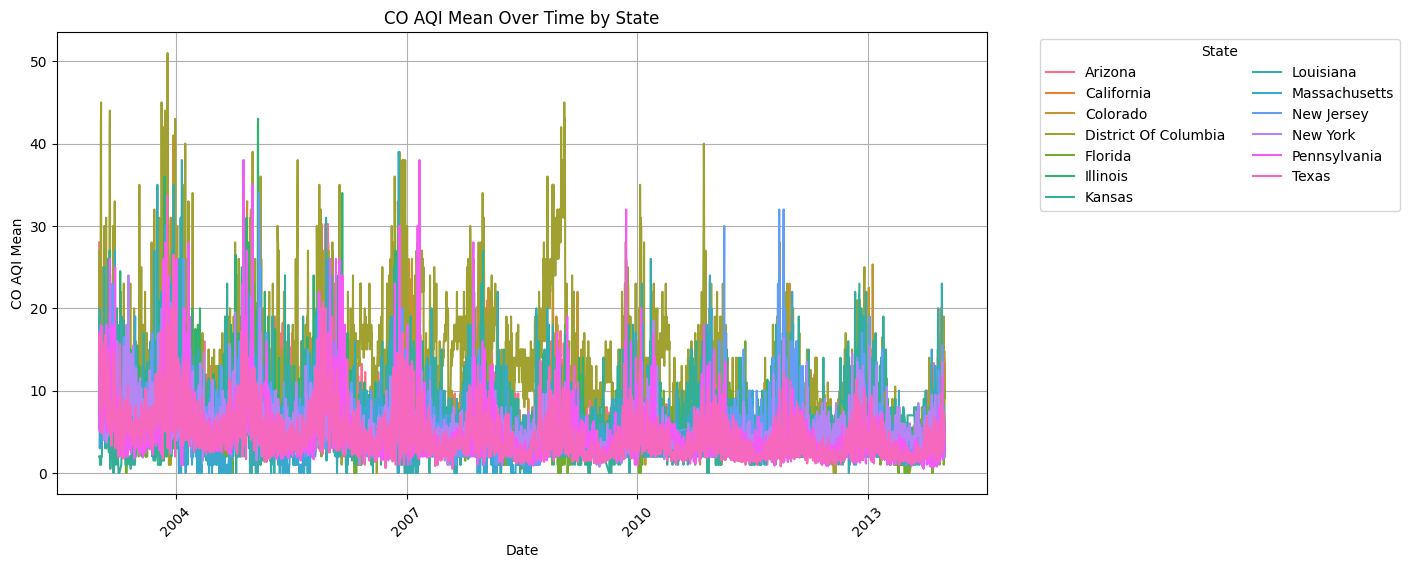

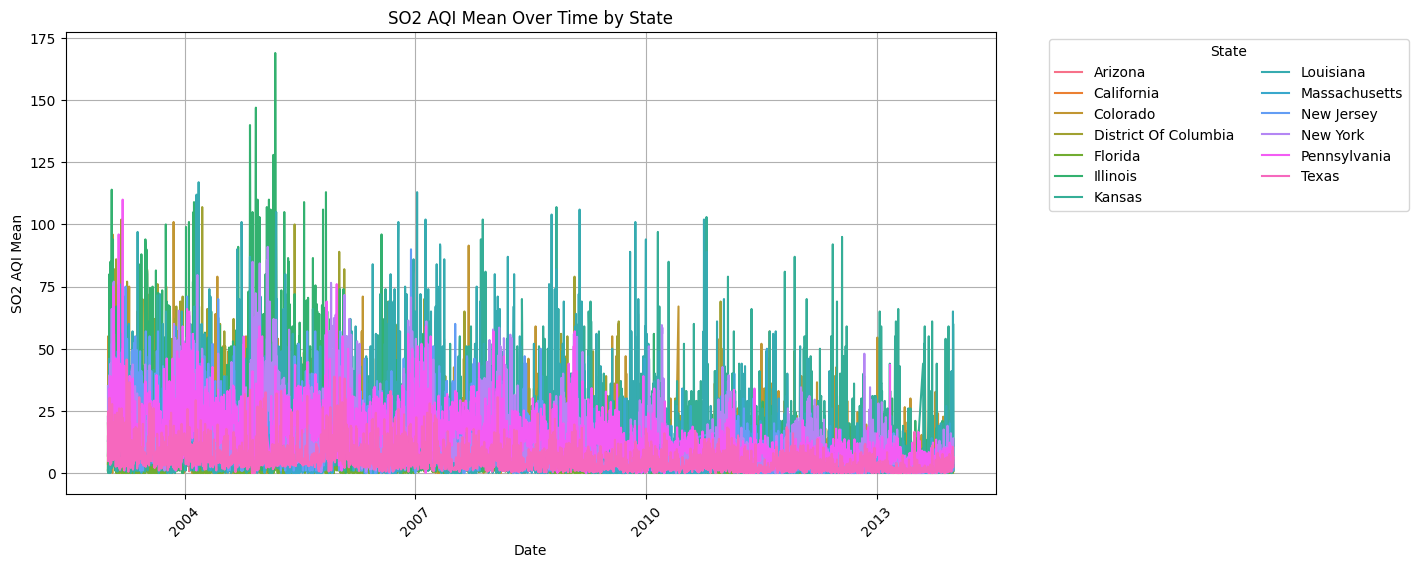

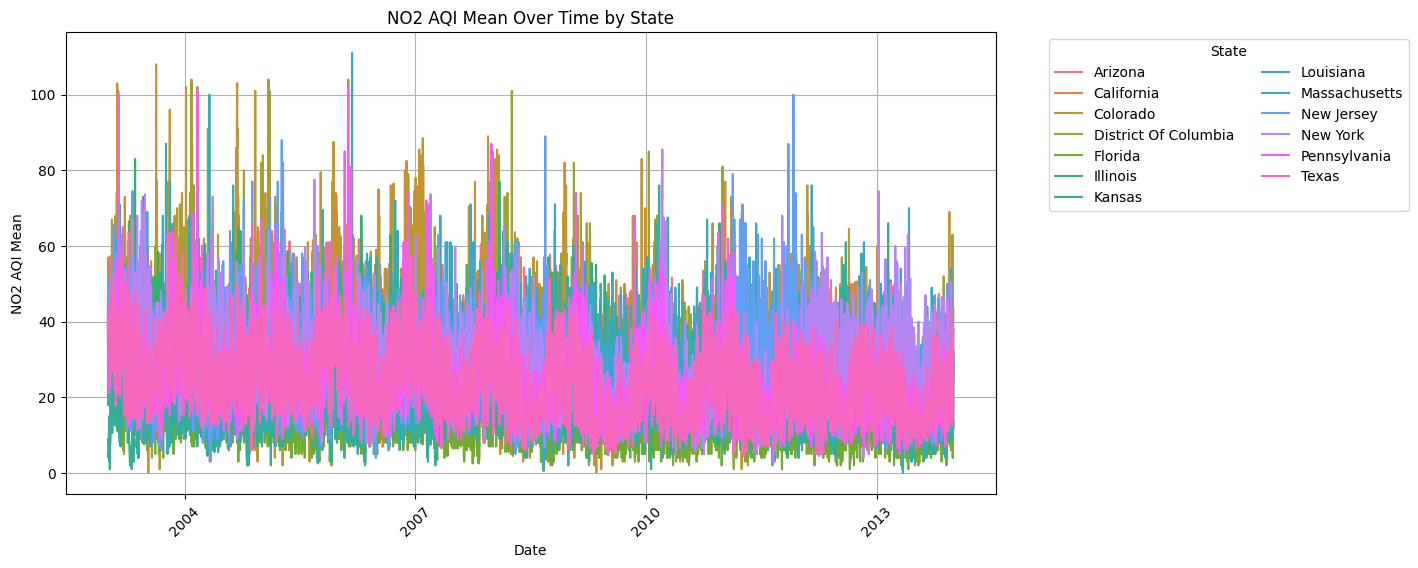

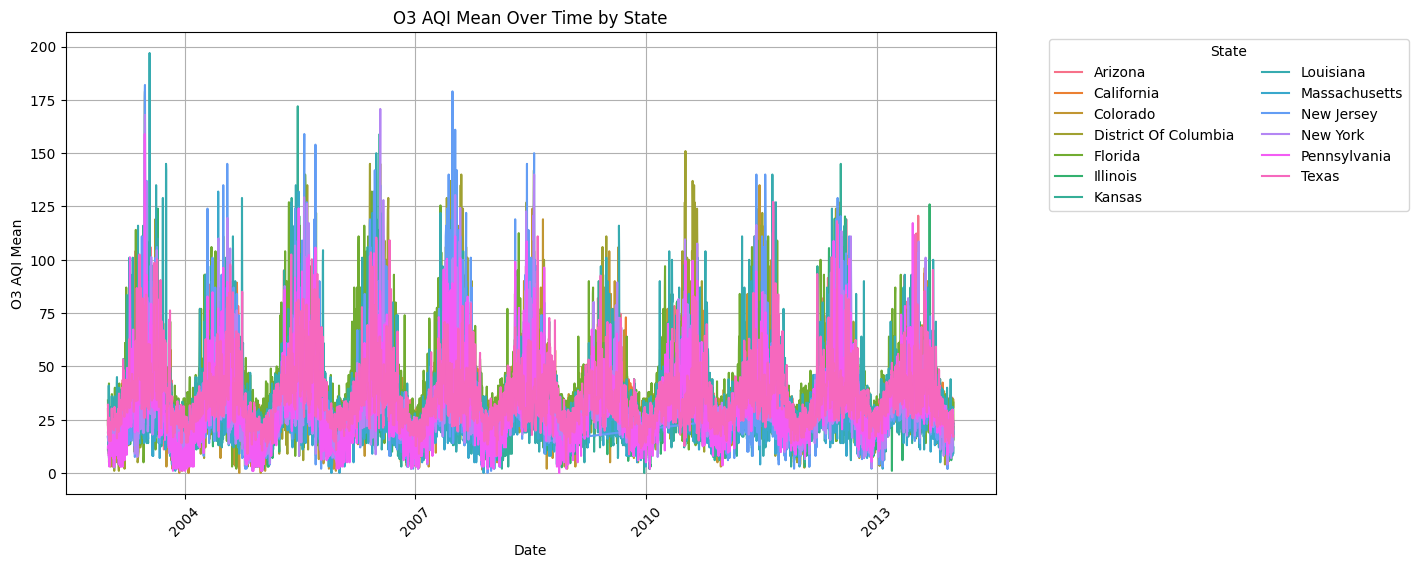

In [42]:
import matplotlib.dates as mdates

# Ensure Date Local is in datetime format
state_aqi_summary["Date Local"] = pd.to_datetime(state_aqi_summary["Date Local"])

# Check if the full date range (2003-2013) exists
print("Min Date:", state_aqi_summary["Date Local"].min())
print("Max Date:", state_aqi_summary["Date Local"].max())

# Define a function to plot AQI trends with better date formatting
def plot_aqi_trend(y_col, y_label, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=state_aqi_summary, x="Date Local", y=y_col, hue="State", linewidth=1.5)

    # Formatting
    plt.xlabel("Date")
    plt.ylabel(y_label)
    plt.title(title)

    # Adjust x-axis to show fewer labels (every 3 years instead of 2)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(3))  # Show ticks every 3 years
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Show only the year

    # Improve legend readability if too many states
    plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    plt.grid(True)
    plt.show()

# Plot AQI trends for all four pollutants
plot_aqi_trend("CO AQI Mean", "CO AQI Mean", "CO AQI Mean Over Time by State")
plot_aqi_trend("SO2 AQI Mean", "SO2 AQI Mean", "SO2 AQI Mean Over Time by State")
plot_aqi_trend("NO2 AQI Mean", "NO2 AQI Mean", "NO2 AQI Mean Over Time by State")
plot_aqi_trend("O3 AQI Mean", "O3 AQI Mean", "O3 AQI Mean Over Time by State")



---

T-Test for CO AQI: t-statistic = 93.43, p-value = 0.0000
T-Test for SO2 AQI: t-statistic = 100.03, p-value = 0.0000
T-Test for NO2 AQI: t-statistic = 100.63, p-value = 0.0000
T-Test for O3 AQI: t-statistic = -8.81, p-value = 0.0000


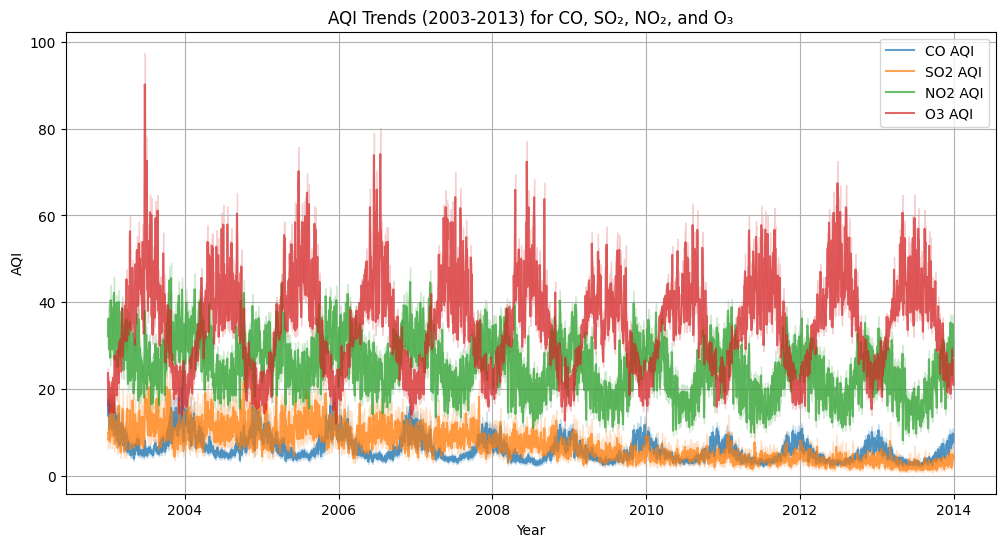

In [43]:
import scipy.stats as stats

# Ensure 'Date Local' is in datetime format
filtered_pollution["Date Local"] = pd.to_datetime(filtered_pollution["Date Local"])

# Extract AQI values for 2003 and 2013
pollution_2003 = filtered_pollution[filtered_pollution["Year"] == 2003]
pollution_2013 = filtered_pollution[filtered_pollution["Year"] == 2013]

# Perform independent t-tests for all four pollutants
pollutants = ["CO AQI", "SO2 AQI", "NO2 AQI", "O3 AQI"]
t_test_results = {}

for pollutant in pollutants:
    t_stat, p_value = stats.ttest_ind(pollution_2003[pollutant].dropna(), 
                                      pollution_2013[pollutant].dropna(), 
                                      equal_var=False)
    t_test_results[pollutant] = (t_stat, p_value)

# Print results
for pollutant, (t_stat, p_value) in t_test_results.items():
    print(f"T-Test for {pollutant}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Visualization: Line plot of all AQI trends
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.lineplot(data=filtered_pollution, x="Date Local", y=pollutant, label=pollutant, alpha=0.7)

# Formatting
plt.xlabel("Year")
plt.ylabel("AQI")
plt.title("AQI Trends (2003-2013) for CO, SO₂, NO₂, and O₃")
plt.legend()
plt.grid(True)
plt.show()

For our first hypotheses, we believed that all 4 AQI level's would decrease from 2003-2013 due to environmental regulations, and the reason why we believed it would decrease was because due to better vehicle emission standards and clean air policies targeting power plants. 

However, our results from the t-test were that there was a positive t-statistic for CO2, SO2 and NO2, which means that the 2013 values are higher compared to 2003; and we have a negative t-statistic for O3 which means that the 2013 values are lower compared to 2003.

These results indicate that our first hypotheses was correct for O3, but incorrect for the rest of our AQI's. Now a reason for why this might have happened could have been for CO2 is because there are more vehicles on the road despite the cleaner engines, leading to more CO2 emissions overall. A business impact from this could be that due to CO2 levels rising, this could cause governments to impose stricter emission limits which would directly affect car manufactures.

A reason for why our hypotheses is incorrect for SO2 is because of increased coal consumption as if industries or power plants are using more coal rather than natural gas, then SO2 levels would rise. A business impact from this could be electricity prices as if coal use is restricted, then energy prices could rise, impacting both businesses and consumers.

A reason for why our hypotheses is incorrect for NO2 is because of traffic congestion and urbanization as higher population density will lead to more emissions from vehicles and industries. A business impact from this could be increased healthcare costs as more NO2 pollution leads to higher respiratory illnesses which could increase insurance and healthcare expenses.

However, a reason for why our hypotheses is correct for O3 is because of stronger air quality regulations as policies specifically targeting O3 pollution may have been more effective compared to the others. A business impact from this could be tourism and real estate as cleaner air attracts more people to cities, which could boost economic growth.

---

T-Test for CO AQI: t-statistic = -83.59, p-value = 0.0000


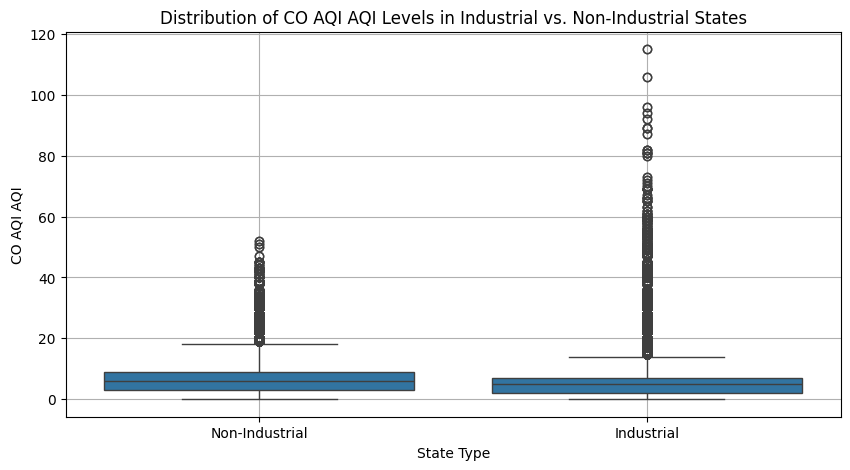

T-Test for SO2 AQI: t-statistic = -14.24, p-value = 0.0000


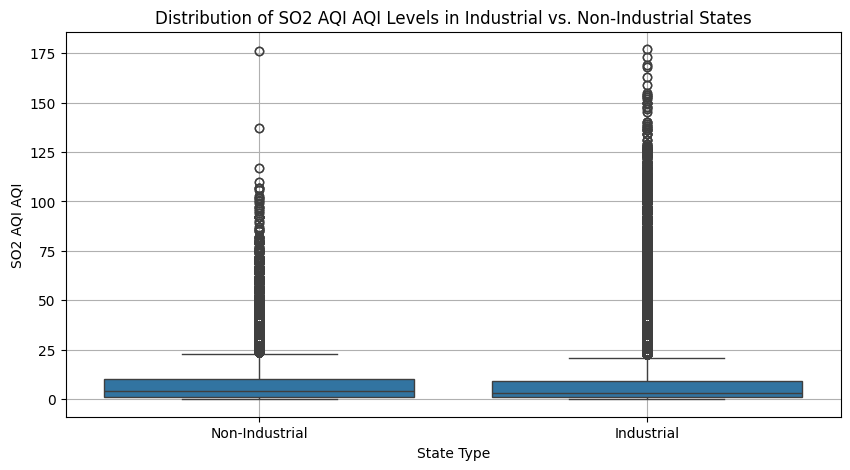

T-Test for NO2 AQI: t-statistic = -150.77, p-value = 0.0000


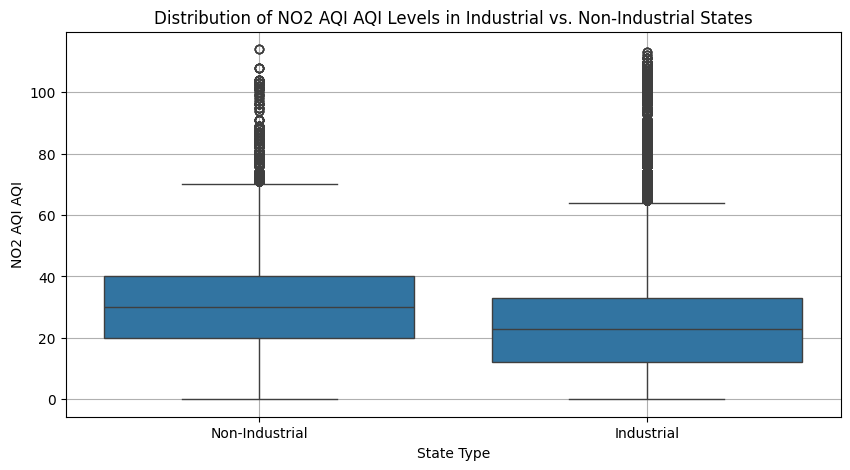

T-Test for O3 AQI: t-statistic = 14.83, p-value = 0.0000


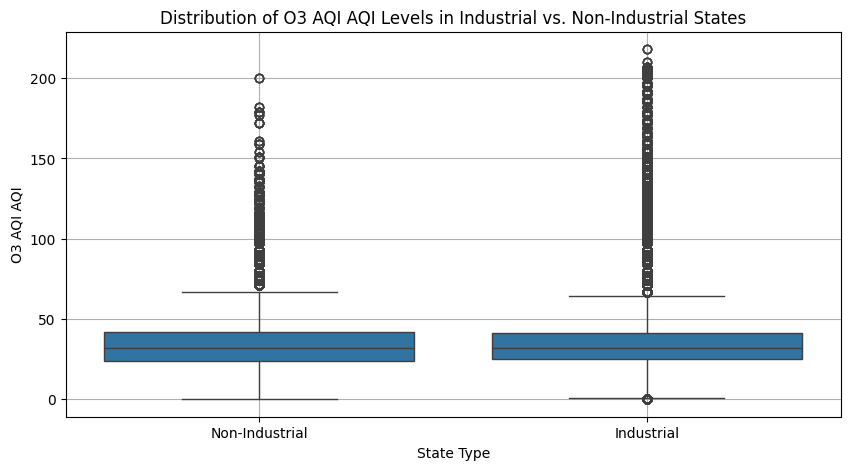

In [44]:
# Define industrial and non-industrial states (example list, adjust as needed)
industrial_states = ["Texas", "California", "Pennsylvania", "Ohio", "Illinois", "New York", "Michigan", "Indiana", "Louisiana"]
filtered_pollution["Industrial"] = filtered_pollution["State"].apply(lambda x: "Industrial" if x in industrial_states else "Non-Industrial")

# Separate data
industrial_pollution = filtered_pollution[filtered_pollution["Industrial"] == "Industrial"]
non_industrial_pollution = filtered_pollution[filtered_pollution["Industrial"] == "Non-Industrial"]

# Function to perform t-test and plot distributions
def compare_pollution_levels(pollutant):
    industrial_values = industrial_pollution[pollutant].dropna()
    non_industrial_values = non_industrial_pollution[pollutant].dropna()
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(industrial_values, non_industrial_values, equal_var=False)
    
    # Print results
    print(f"T-Test for {pollutant}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
    
    # Visualization
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="Industrial", y=pollutant, data=filtered_pollution)
    plt.title(f"Distribution of {pollutant} AQI Levels in Industrial vs. Non-Industrial States")
    plt.ylabel(f"{pollutant} AQI")
    plt.xlabel("State Type")
    plt.grid(True)
    plt.show()

# Apply for all four pollutants
compare_pollution_levels("CO AQI")
compare_pollution_levels("SO2 AQI")
compare_pollution_levels("NO2 AQI")
compare_pollution_levels("O3 AQI")

For our second hypotheses, we believed that states with higher industrial activity have higher levels of CO2, NO2, SO2 and O3 compared to states with lower industrial activity.

Our results from the t-test showed that CO2, SO2 and NO2 have significantly negative t-statistics, which would indicate that their means were lower in urban areas compared to rural areas. Whilst O3 has a positive t-statistic suggesting that their ozone levels were actually higher in urban areas compared to rural areas.

Our second hypotheses has similar results to our first, as it was partially correct for O3, but incorrect for the other AQI's. A reason for why this was correct for O3 could be that industrial states could have more volatile organic compounds (VOC) from factories and vehicle exhaust which leads to more O3 formation. A business impact from this could be that healthcare costs could also rise because rural areas may need better air quality monitoring to track dispersed pollutants.

A reason for why our hypotheses is incorrect for CO2 can be due to stricter emission regulations and cleaner transportation methods in cities. A business impact from this could be an increase in economic development because urban areas may need stricter building regulations to improve air quality such as requiring green roofs for example.

A reason for why our hypotheses is incorrect for SO2 can be because rural areas can experience higher SO2 values due to industrial emissions, agricultural burning and fewer emission controls. A business impact from this could be for the energy sector as lower SO2 in cities can suggest strict regulations on coal power plants, and renewable energy businesses can benefit from this.

A reason for why out hypotheses is incorrect for NO2 can be because pollution disperses more effectively in rural areas due to fewer obstacles such as tall buildings. A business impact from this could be for an increase in the automotive industries because stronger NO2 restrictions push cities towards electric vehicles adoption.

---

T-Test for SO2 AQI: t-statistic = 123.11, p-value = 0.0000
T-Test for NO2 AQI: t-statistic = -62.57, p-value = 0.0000


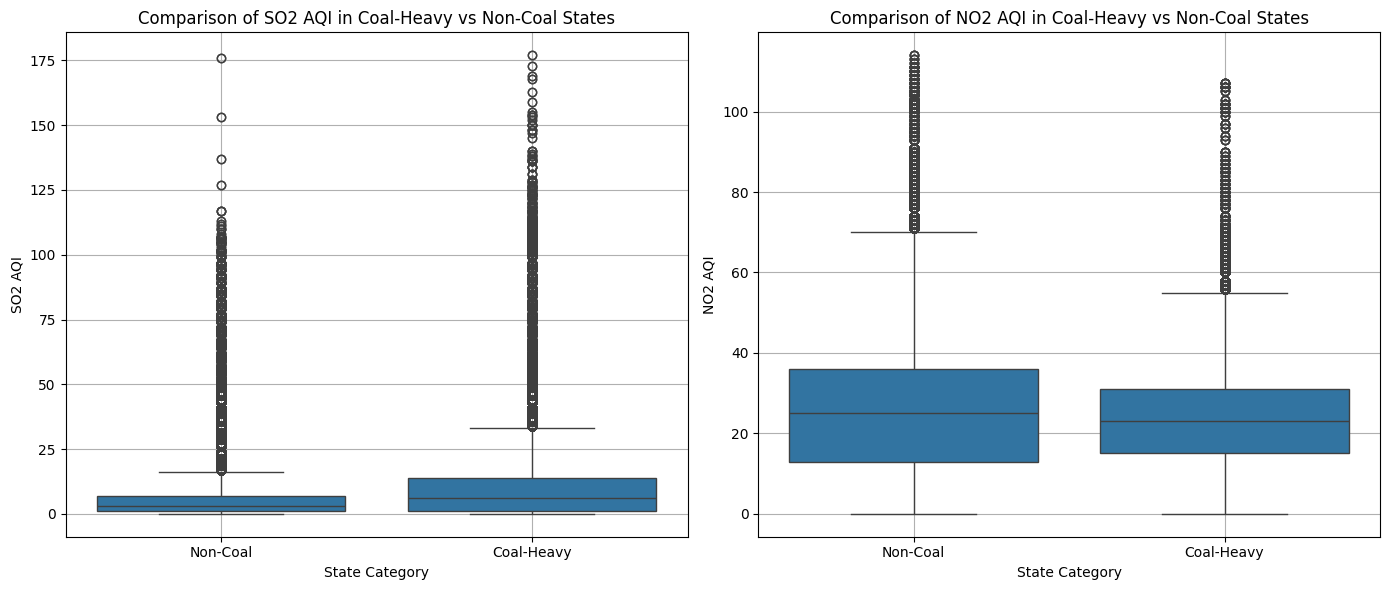

In [46]:
# Define coal-heavy states
coal_states = ["Texas", "Pennsylvania", "Illinois"]

# Create a new column to categorize states
filtered_pollution["Coal State"] = filtered_pollution["State"].apply(lambda x: "Coal-Heavy" if x in coal_states else "Non-Coal")

# Extract SO2 AQI values
so2_coal = filtered_pollution[filtered_pollution["Coal State"] == "Coal-Heavy"]["SO2 AQI"].dropna()
so2_non_coal = filtered_pollution[filtered_pollution["Coal State"] == "Non-Coal"]["SO2 AQI"].dropna()

# Extract NO2 AQI values
no2_coal = filtered_pollution[filtered_pollution["Coal State"] == "Coal-Heavy"]["NO2 AQI"].dropna()
no2_non_coal = filtered_pollution[filtered_pollution["Coal State"] == "Non-Coal"]["NO2 AQI"].dropna()

# Perform independent t-tests
t_stat_so2, p_value_so2 = stats.ttest_ind(so2_coal, so2_non_coal, equal_var=False)
t_stat_no2, p_value_no2 = stats.ttest_ind(no2_coal, no2_non_coal, equal_var=False)

# Print results
print(f"T-Test for SO2 AQI: t-statistic = {t_stat_so2:.2f}, p-value = {p_value_so2:.4f}")
print(f"T-Test for NO2 AQI: t-statistic = {t_stat_no2:.2f}, p-value = {p_value_no2:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# SO2 AQI Boxplot
sns.boxplot(data=filtered_pollution, x="Coal State", y="SO2 AQI", ax=axes[0])
axes[0].set_title("Comparison of SO2 AQI in Coal-Heavy vs Non-Coal States")
axes[0].set_xlabel("State Category")
axes[0].set_ylabel("SO2 AQI")
axes[0].grid(True)

# NO2 AQI Boxplot
sns.boxplot(data=filtered_pollution, x="Coal State", y="NO2 AQI", ax=axes[1])
axes[1].set_title("Comparison of NO2 AQI in Coal-Heavy vs Non-Coal States")
axes[1].set_xlabel("State Category")
axes[1].set_ylabel("NO2 AQI")
axes[1].grid(True)

plt.tight_layout()
plt.show()


For our third hypotheses, we believed that SO2 and NO2 levels are higher in states with more coal power plants compared to non-coal states.

Our results from the t-test showed that SO2 has a very high positive t-statistic and this could be because coal combustion releases large amount of SO2's which contributes to acid rain; whilst NO2 has a negative t-statistic and this could be because of reduced traffic density.

Our hypotheses was proved corect for SO2 and incorrect for NO2, and a reason why this could occur for SO2 could be because SO2 is primarily released from burning fossil fuels, especially coal. Another reason why this could occur is because states with more coal power plants logically have higher SO2 levels. A business impact from this could be an increase in policy and regulations as states with high SO2 may face stricter emission control mandates, which could then lead to power plants transitioning to natural gas and renewables.

A reason for why our hypotheses is incorrect for NO2 could be because many coal-heavy states have large rural areas with minimal traffic which can lead to lower NO2 emissions compared to highly urbanized states such as California. Another reason for this could be NO2 is not primarily released by coal plants, as it mainly comes from vehicle emissions and urban congestion. A business impact from this could be a decrease within the energy sector because power companies could argue that coal plants are not the biggest NO2 contributors, potentially shifting blame to either vehicles or other sources.

---

T-Test for CO AQI: t-statistic = 196.25, p-value = 0.0000
T-Test for NO2 AQI: t-statistic = 216.09, p-value = 0.0000


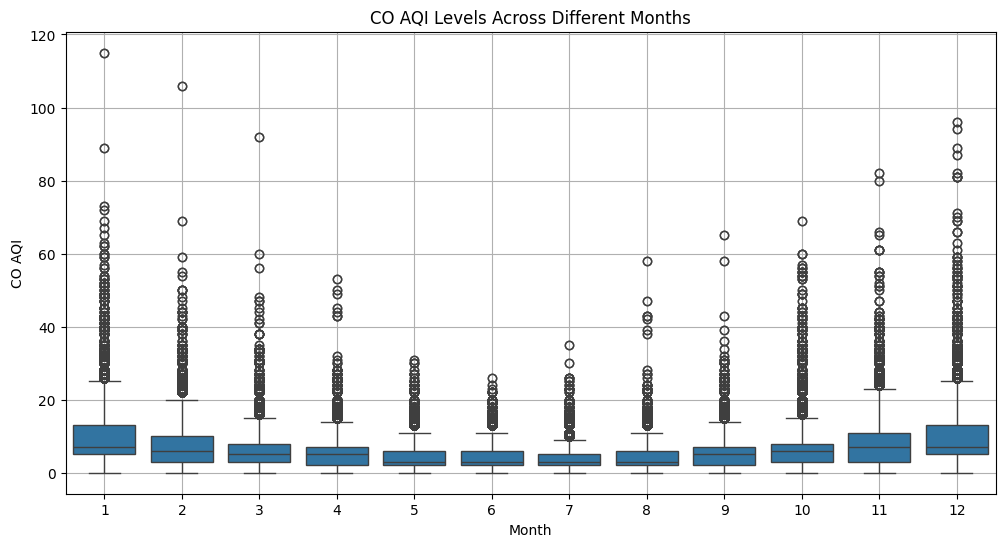

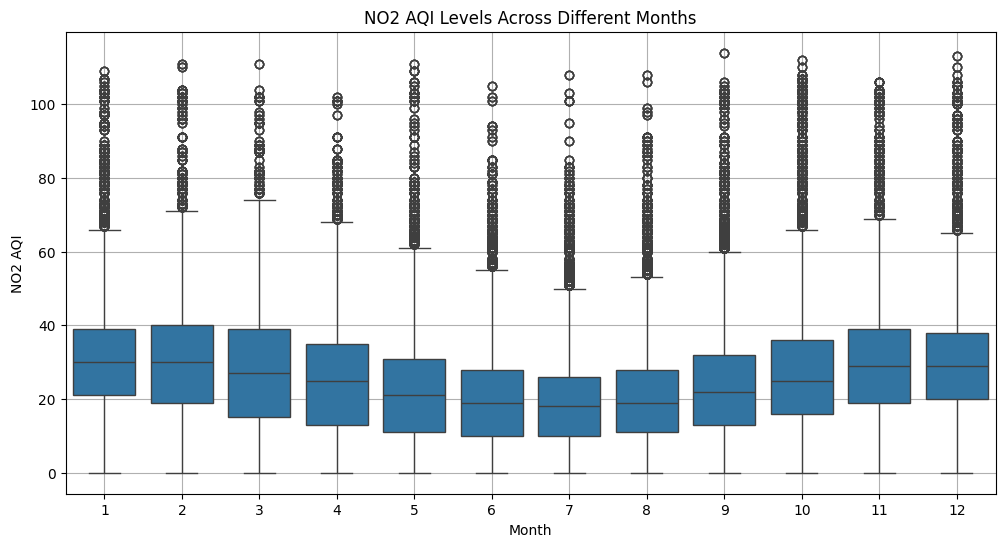

In [47]:
# Ensure Date Local is in datetime format
filtered_pollution["Date Local"] = pd.to_datetime(filtered_pollution["Date Local"])

# Extract month information
filtered_pollution["Month"] = filtered_pollution["Date Local"].dt.month

# Define winter (Dec, Jan, Feb) and summer (Jun, Jul, Aug)
winter_months = [12, 1, 2]
summer_months = [6, 7, 8]

# Filter data for winter and summer
winter_pollution = filtered_pollution[filtered_pollution["Month"].isin(winter_months)]
summer_pollution = filtered_pollution[filtered_pollution["Month"].isin(summer_months)]

# Extract AQI values
co_winter = winter_pollution["CO AQI"].dropna()
co_summer = summer_pollution["CO AQI"].dropna()

no2_winter = winter_pollution["NO2 AQI"].dropna()
no2_summer = summer_pollution["NO2 AQI"].dropna()

# Perform independent t-tests
t_stat_co, p_val_co = stats.ttest_ind(co_winter, co_summer, equal_var=False)
t_stat_no2, p_val_no2 = stats.ttest_ind(no2_winter, no2_summer, equal_var=False)

# Print results
print(f"T-Test for CO AQI: t-statistic = {t_stat_co:.2f}, p-value = {p_val_co:.4f}")
print(f"T-Test for NO2 AQI: t-statistic = {t_stat_no2:.2f}, p-value = {p_val_no2:.4f}")

# Visualization of seasonal variations
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_pollution, x="Month", y="CO AQI")
plt.title("CO AQI Levels Across Different Months")
plt.xlabel("Month")
plt.ylabel("CO AQI")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_pollution, x="Month", y="NO2 AQI")
plt.title("NO2 AQI Levels Across Different Months")
plt.xlabel("Month")
plt.ylabel("NO2 AQI")
plt.grid(True)
plt.show()

For our fourth hypotheses, we believed that CO2 and NO2 AQI levels spike during winter months due to increased heating and stagnant air.

Our results from the t-test indicated that CO2 and NO2 both have positive t-statistics which could be because cold air traps pollutants, leading to higher indoor and outdoor CO2 levels.

Our hypotheses was proved correct for CO2 could be due to the season, as during winter, people naturally end up burning more fossil fuels such as natural gas and wood for heating. Another reason why our hypotheses was correct for CO2 could be because CO2 is utilised more for home heating and power plants. A business impact from this could be regulation impacts as due to increased levels of CO2, this could lead to increased demand for air purifiers and CO2 detectors.

A reason for why our hypotheses was proved correct for NO2 could be because cold air also traps NO2 close to the ground rather than letting it disperse. A business impact from this could be increased public health risks as high NO2 exposure leads to asthma and lung diseases.

---

T-Test for O₃ AQI: t-statistic = 381.89, p-value = 0.0000


C:\Users\seebi\AppData\Local\Temp\ipykernel_12640\1850655754.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_pollution, x="Month", y="O3 AQI", palette="coolwarm")


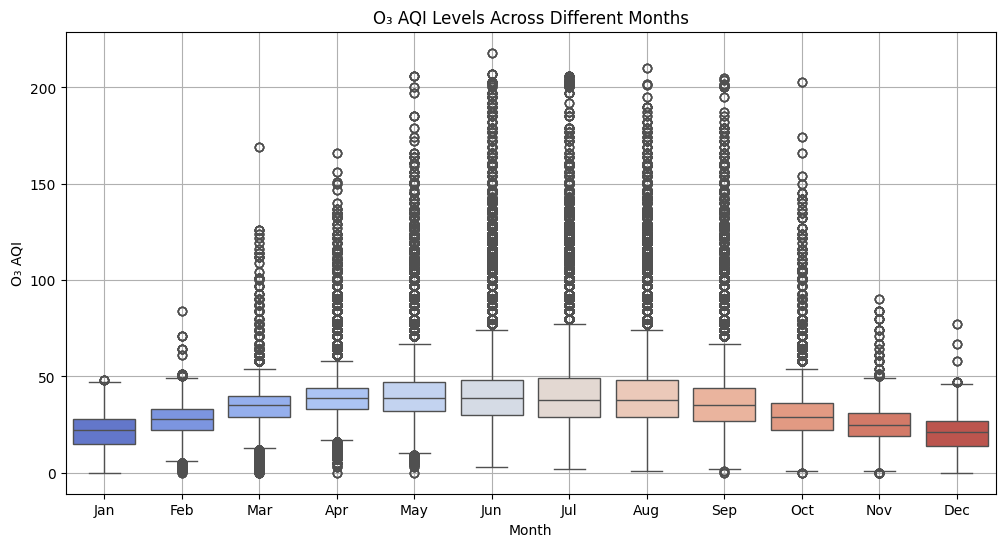

In [48]:
# Ensure Date Local is in datetime format
filtered_pollution["Date Local"] = pd.to_datetime(filtered_pollution["Date Local"])

# Extract month from Date Local
filtered_pollution["Month"] = filtered_pollution["Date Local"].dt.month

# Define summer (June-Aug) and winter (Dec-Feb)
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filter summer and winter data
ozone_summer = filtered_pollution[filtered_pollution["Month"].isin(summer_months)]["O3 AQI"]
ozone_winter = filtered_pollution[filtered_pollution["Month"].isin(winter_months)]["O3 AQI"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(ozone_summer.dropna(), ozone_winter.dropna(), equal_var=False)

# Print results
print(f"T-Test for O₃ AQI: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Visualization: O₃ AQI Levels Across Months
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_pollution, x="Month", y="O3 AQI", palette="coolwarm")

# Formatting
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("O₃ AQI")
plt.title("O₃ AQI Levels Across Different Months")
plt.grid(True)
plt.show()

For our fifth hypotheses, 